<a href="https://colab.research.google.com/github/rakanakmaltge/Project_ExploratoryDataAnalysis/blob/main/Project_ExploratoryDataAnalysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project EDA Kelompok 4**
Anggota:<br>


* Muhammad Rakan Akmal (210663574)
* Rafly Witjaksana Hartyanto (2106651572)
* Rima Fitrianti Azahra (2106701974)
* Tsabita Asir Saladin (210670786)


Permasalahan: *Subscription Video On Demand* (SVOD) mana yang harus dipilih?<br>

Sumber data CSV: https://raw.githubusercontent.com/smartinternz02/SBSPS-Challenge-5372-OTT-Platform-Analysis-Tool/main/MoviesOnStreamingPlatforms_updated.csv <br>

Sumber data text : API Twitter

## **Import Module**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import numpy as np
import math

In [ ]:
#import untuk data text
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 13:41:05--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-06-12 13:41:05 (67.8 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

--2022-06-12 13:41:05--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41272

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 21.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 24.7 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.

In [ ]:
# import module untuk membantu dalam cleaning data text
import taudataEDA02CTA as tau
import json, urllib.request, requests, tweepy
from urllib.request import Request, urlopen
from tqdm import tqdm

## **Koleksi Data**

### **Import Data CSV**

In [ ]:
#Data csv
url_movies = 'https://raw.githubusercontent.com/smartinternz02/SBSPS-Challenge-5372-OTT-Platform-Analysis-Tool/main/MoviesOnStreamingPlatforms_updated.csv'
movies = pd.read_csv(url_movies)

### **Import Data Text**

In [ ]:
# assign API keys twitter untuk mengakses data twitter
Ck = 'Db9XrpjDJr4j7Y8TGRDZoXhvc'
Cs = 'xxSiCKtfmJjBtnnM5QbCgM1sSt1AIFfQdID5MCdvy7LKfDXhZ3'
At = '1522418610643238913-juEN4pV0kwYawExK1eSo3FcsuXKD8r'
As = 'CaFDf6aMk0X02CuIewpKYLSJVJbknvcIJN2DfApd4EXm9'

Dikarenakan akses untuk SVOD sering diperjualbelikan melalui twitter, maka keywords tweets mengenai SVOD diberikan tambahan operator -jual:). Hal ini bertujuan untuk memfilter data tweets yang ingin dapatkan adalah tentang pembicaraan publik mengenai penggunaan SVOD, bukan mengenai jual-beli akses SVOD.

In [ ]:
# mengambil data dengan batas maksimal 5000 untk keywords tentang SVOD
qry = "netflix -jual:) OR prime video -jual:) OR disney+ -jual:) OR hotstar -jual:) OR hulu -jual:)"
tweetFile = 'D:\tweet_{}_EDA02CTA.json'.format(qry)
try:
    data = tau.loadTweets(file=tweetFile)
    print("Local Data loaded, processing {} tweets.".format(len(data)))
except Exception as Err_:
    print("Local data not available, importing data directly from twitter ... ")
    api = tau.connect(key=(Ck, Cs, At, As))
    data = tau.crawlTwitter(api, qry, N=5000)
    tau.saveTweets(data, file=tweetFile)

tweets = [t['full_text'] for t in data]

Local data not available, importing data directly from twitter ... 
Welcome "Muhamad Rakan Akmal" you are now connected to twitter server
Crawling keyword "netflix -jual:) OR prime video -jual:) OR disney+ -jual:) OR hotstar -jual:) OR hulu -jual:)"


1414it [00:10, 131.79it/s]


Collected 1414 tweets


### **Data CSV Understanding**

In [ ]:
#Melihat tabel data
movies

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,On Netflix,Not on Hulu,Not on Amazon Prime,Not onn Diney+,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,On Netflix,Not on Hulu,Not on Amazon Prime,Not onn Diney+,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,On Netflix,Not on Hulu,Not on Amazon Prime,Not onn Diney+,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,On Netflix,Not on Hulu,Not on Amazon Prime,Not onn Diney+,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,On Netflix,Not on Hulu,On Amazon Prime,Not onn Diney+,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,Not on Netflix,Not on Hulu,Not on Amazon Prime,On Diney+,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,Not on Netflix,Not on Hulu,Not on Amazon Prime,On Diney+,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,Not on Netflix,Not on Hulu,Not on Amazon Prime,On Diney+,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,Not on Netflix,Not on Hulu,Not on Amazon Prime,On Diney+,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [ ]:
#Melihat kolom/variabel beserta ukurannya yang ada pada data
movies.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [ ]:
movies.shape

(16744, 16)

Didapat bahwa data berisi Variabel berikut:
*   ID = Kode Unik Film
*   Title = Judul Film
*   Year = Tahun Rilis Film
*   Age = Batasan Usia Penonton Film
*   IMDb = Rating IMDb Film
*   Rotten Tomatoes = Rating Rotten Tomatoes Film
*   Netflix = Apakah film itu ada di Netflix
*   Hulu = Apakah film itu ada di Hulu
*   Prime Video = Apakah film itu ada di Prime Video
*   Disney+ = Apakah film itu ada di Disney+
*   Type= Film atau Serial TV
*   Directors = Sutradara Film
*   Genres = Genre Film
*   Country = Asal Negara Film
*   Language = Bahasa Film
*   Runtime = Durasi Film






In [ ]:
#melihat sebaran data
movies.describe()

,ID,Year,IMDb,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,0.0,1256.000000


Terlihat bahwa tidak ada nilai yang 'aneh' pada sebaran data. Data sudah seperti yang seharusnya.

## **Preprocessing**

###**Data CSV**

####**Replacing**
Terlihat bahwa keberadaan sebuah film di antara platform tersebut masih berstatus "On [Nama Platform]" dan "Not on [Nama Platform]". Untuk memudahkan visualisasi nantinya, akan dilakukan replacing dengan 1 untuk "On [Nama Platform]" dan 0 untuk "Not on [Nama Platform]".

In [ ]:
#replacing
movies.replace(['On Netflix','On Hulu','On Amazon Prime','On Diney+'], 1, inplace = True)
movies.replace(['Not on Netflix','Not on Hulu','Not on Amazon Prime','Not onn Diney+'], 0, inplace = True)

In [ ]:
movies

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


####**Mengatasi Missing Values**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


Periksa null values

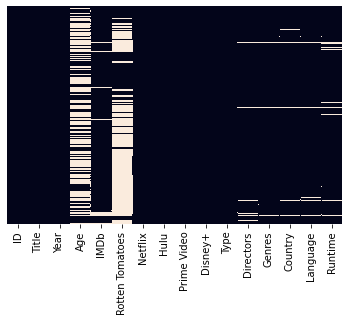

In [ ]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False)

In [ ]:
movies.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

Didapat bahwa "Rotten Tomatoes" memiliki jumlah missing value yang paling banyak diantara variabel lainnya. Dengan pertimbangan nilai rating yang digunakan masih dapat didasarkan pada variabel "IMDb", variabel "Rotten Tomatoes" akan di drop.

In [ ]:
movies.drop(columns = 'Rotten Tomatoes', inplace = True)

#### **Mengatasi variabel yang kurang relevan**

In [ ]:
movies['Type'].unique()

array([0])

Variabel type seharusnya menunjukkan bahwa judul tersebut merupakan film atau serial, namun terlihat bahwa semuanya berjenis '0' yang tidak menggambarkan apapun. Maka, kolom ini akan di drop dengan pertimbangan bahwa kolom ini tidak dapat digunakan untuk visualisasi.

In [ ]:
movies.drop(columns = 'Type', inplace = True)
movies

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


###**Data Text**

In [ ]:
# melakukan data cleaning dengan stopwords didasarkan pada bahasa indonesia
stopId, lemmaId = tau.LoadStopWords(lang='id')
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

cleaned_data = []
for tweet in tqdm(tweets):
    cleaned_data.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

cleaned_data[:7]

100%|██████████| 1414/1414 [04:17<00:00,  5.49it/s]


['rt piargh nomor smart televisi nomor wifi and televisi korang layan netflix disney hotstar prime video youtube',
 'rt piargh nomor smart televisi nomor wifi and televisi korang layan netflix disney hotstar prime video youtube',
 'rt jpfbase jpf kakegurui twin new pv release global tanggal agustus netflix mappa studio ngomong-ngomong mary',
 'kemarin netflix rilis teaser lanjut episode season the cuphead show episode rilis agustus the cuphead show serial sedia netflix libat dubber indonesia baik',
 'rt piargh nomor smart televisi nomor wifi and televisi korang layan netflix disney hotstar prime video youtube',
 'rt piargh nomor smart televisi nomor wifi and televisi korang layan netflix disney hotstar prime video youtube',
 'ngelaugh netflix kakk video shar ayo kak']

Dapat terlihat dari sampel data yang diambil, data tweets mengenai SVOD dapat dikatakan menjadi lebih bersih dan mudah untuk diolah.

## **Visualisasi**

### **Jumlah Film Per Platform**

In [ ]:
movies.sum()

ID                                                     140189140
Title          InceptionThe MatrixAvengers: Infinity WarBack ...
Year                                                    33538467
IMDb                                                     95465.2
Netflix                                                     3560
Hulu                                                         903
Prime Video                                                12354
Disney+                                                      564
Runtime                                                1508814.0
dtype: object

Dari informasi tersebut terlihat bahwa prime video memiliki jumlah film paling banyak di antara platform lainnya.

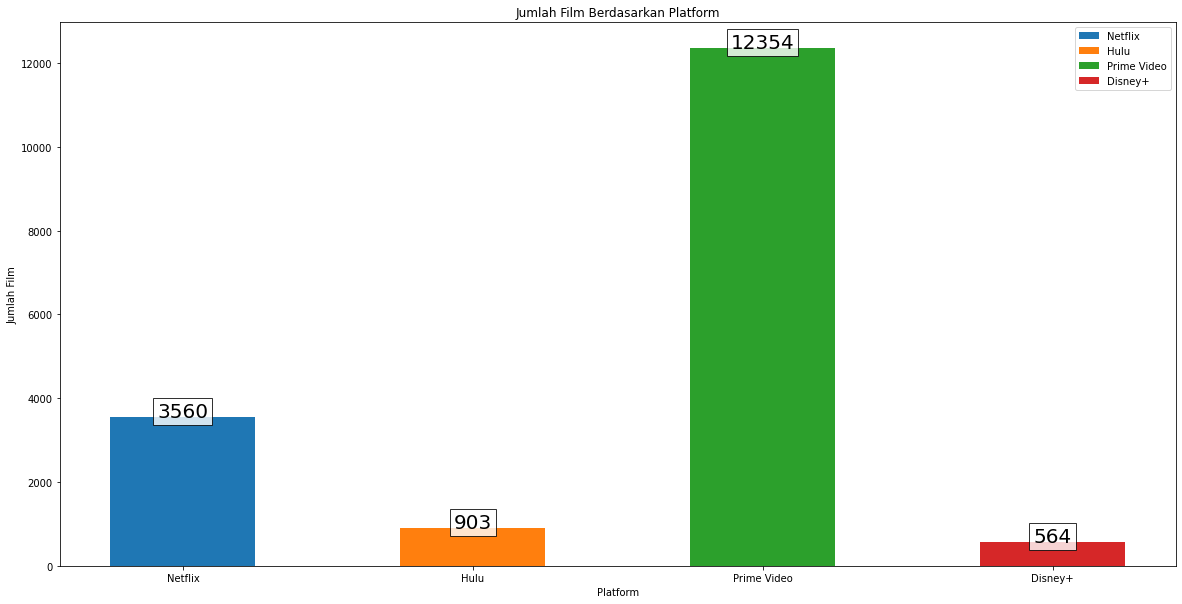

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=20, Bbox = dict(facecolor = 'white', alpha =.8))

plt.rcParams["figure.figsize"] = (20,10)

X_jumlah_netflix =  ['Netflix','Hulu','Prime Video', 'Disney+']
jumlah_netflix = movies['Netflix'].sum()
jumlah_hulu = movies['Hulu'].sum()
jumlah_prime = movies['Prime Video'].sum()
jumlah_disney = movies['Disney+'].sum()

X_axis_jumlah = np.arange(len(X_jumlah_netflix))


plt.bar(0  +0, jumlah_netflix, 0.5, label = 'Netflix')
plt.bar(1  +0, jumlah_hulu, 0.5, label = 'Hulu')
plt.bar(2  +0, jumlah_prime, 0.5, label = 'Prime Video')
plt.bar(3  +0, jumlah_disney, 0.5, label = 'Disney+')
addlabels(X_jumlah_netflix, [jumlah_netflix, jumlah_hulu, jumlah_prime, jumlah_disney])
plt.xticks(X_axis_jumlah, ['Netflix','Hulu','Prime Video', 'Disney+'])
plt.xlabel("Platform")
plt.ylabel("Jumlah Film")
plt.title("Jumlah Film Berdasarkan Platform")
plt.legend()
plt.show()

### **Jumlah Film Berdasarkan Tahun per Platform**
- Jumlah Film Berdasarkan Tahun Rilis
- Jumlah Film Terbaru 2010s per Platform

In [ ]:
x =  ['Netflix','Hulu','Prime Video', 'Disney+']

In [ ]:
df_tahun = movies
for i in range(len(df_tahun['Year'])):
  if math.isnan(df_tahun['Year'][i]) == True:
    continue
  else:
    df_tahun['Year'][i] = math.floor(df_tahun['Year'][i])

In [ ]:
tahun_netflix = 0
sum_tahun_netflix = 0
tahun_hulu = 0
sum_tahun_hulu = 0
tahun_prime = 0
sum_tahun_prime = 0
tahun_disney = 0
sum_tahun_disney = 0

for i in range(len(movies['ID'])):
  if math.isnan(df_tahun['Year'][i]) == False:
    if movies['Netflix'][i] == 1:
      tahun_netflix+=movies['Year'][i]
      sum_tahun_netflix+=1
    elif movies['Hulu'][i] == 1:
      tahun_hulu+=movies['Year'][i]
      sum_tahun_hulu+=1
    elif movies['Prime Video'][i] == 1:
      tahun_prime+=movies['Year'][i]
      sum_tahun_prime+=1
    elif movies['Disney+'][i] == 1:
      tahun_disney+=movies['Year'][i]
      sum_tahun_disney+=1

In [ ]:
rata_netflix_tahun = round(tahun_netflix/sum_tahun_netflix, 2)
rata_hulu_tahun = round(tahun_hulu/sum_tahun_hulu, 2)
rata_prime_tahun = round(tahun_prime/sum_tahun_prime, 2)
rata_disney_tahun = round(tahun_disney/sum_tahun_disney, 2)

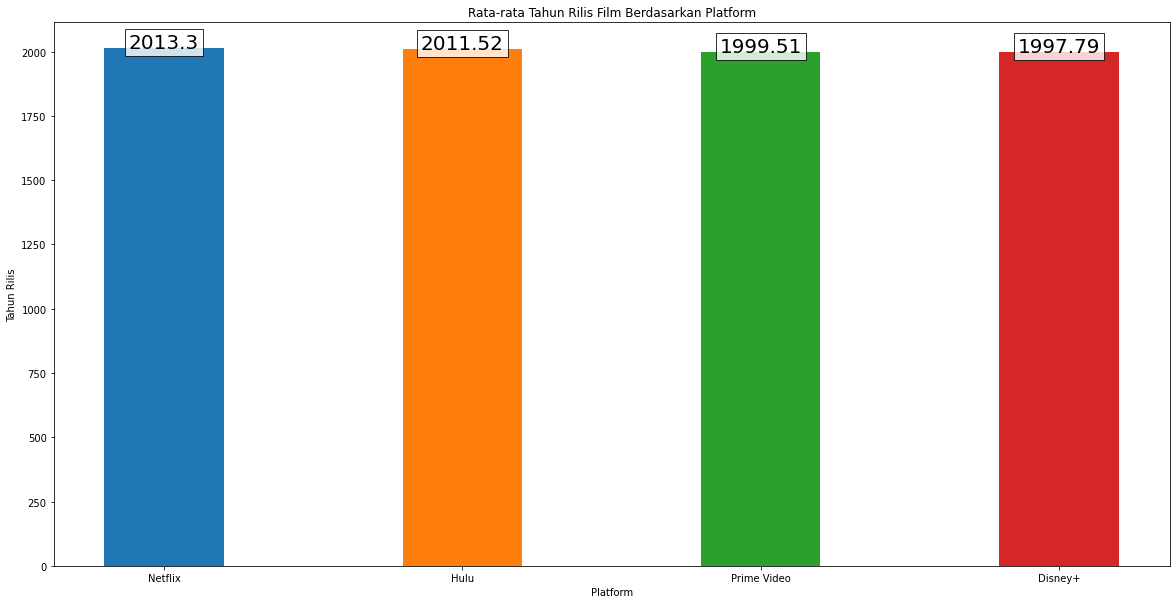

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=20, Bbox = dict(facecolor = 'white', alpha =.8))

data = {'Netflix':rata_netflix_tahun, 'Hulu':rata_hulu_tahun, 'Prime Video':rata_prime_tahun,
        'Disney+':rata_disney_tahun}
platform = list(data.keys())
rata = list(data.values())

# creating the bar plot
plt.bar(platform, rata, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width = 0.4)
addlabels(platform, rata)
plt.xlabel("Platform")
plt.ylabel("Tahun Rilis")
plt.title("Rata-rata Tahun Rilis Film Berdasarkan Platform")


plt.show()

In [ ]:
# Karena range tahun terlalu luas, jika divisualisasikan hasilnya akan kurang terlihat. Maka akan dikelompokkan tahun-tahun tersebut menjadi 7 bagian.
def tahun(data):
    data_str = str(data).strip()
    if data in range(1910,1960):
      return '<1960s'
    if data in range(1960,1970):
      return '1960s'
    if data in range(1970,1980):
      return '1970s'
    if data in range(1980,1990):
      return '1980s'
    if data in range(1990,2000):
      return '1990s'
    if data in range(2000,2010):
      return '2000s'
    if data in range(2010,2020):
      return '2010s'

movies['overview_tahun'] = movies['Year'].apply(tahun)

In [ ]:
movies['overview_tahun']

0         2010s
1         1990s
2         2010s
3         1980s
4         1960s
          ...  
16739     1980s
16740     2000s
16741     2010s
16742     2010s
16743    <1960s
Name: overview_tahun, Length: 16744, dtype: object

In [ ]:
#Membuat list untuk divisualisasikan
tahun_rilis = []
for i in range(len(x)):
  movie_count = [movies[movies['overview_tahun'] == '<1960s'][x[i]].sum(), movies[movies['overview_tahun'] == '1960s'][x[i]].sum(),
                 movies[movies['overview_tahun'] == '1970s'][x[i]].sum(), movies[movies['overview_tahun'] == '1980s'][x[i]].sum(),
                 movies[movies['overview_tahun'] == '1990s'][x[i]].sum(), movies[movies['overview_tahun'] == '2000s'][x[i]].sum(),
                 movies[movies['overview_tahun'] == '2010s'][x[i]].sum()]
  tahun_rilis.append(movie_count)

In [ ]:
tahun_rilis

[[12, 7, 29, 66, 115, 359, 2868],
 [11, 4, 11, 24, 42, 111, 694],
 [1098, 346, 717, 661, 801, 2371, 6328],
 [40, 23, 31, 35, 84, 184, 158]]

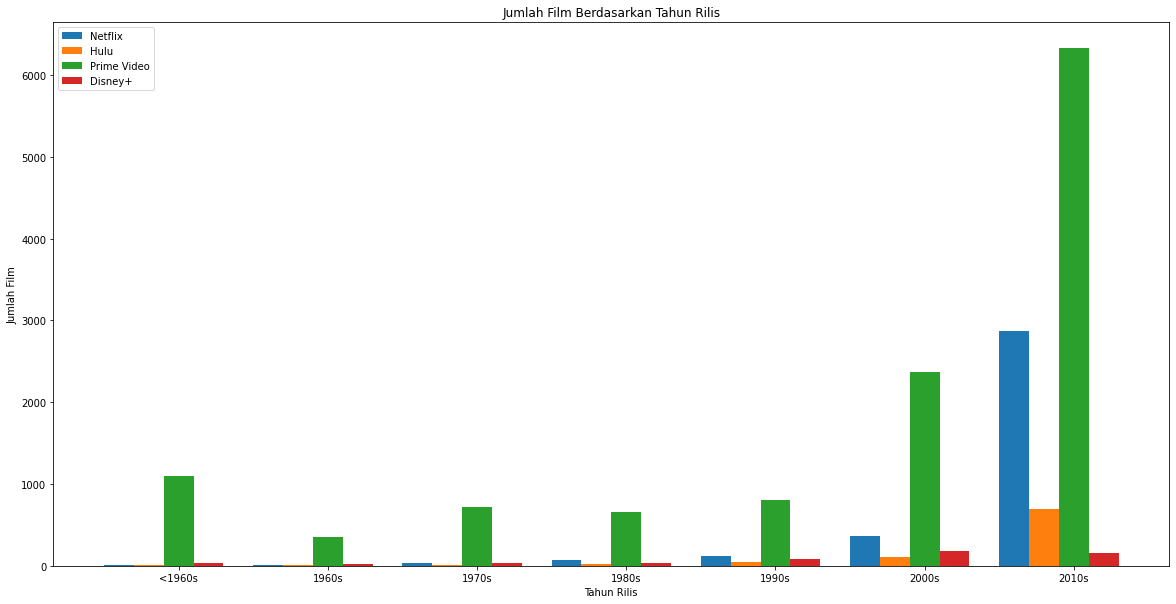

In [ ]:
#Membuat plot
plt.rcParams["figure.figsize"] = (20,10)

X =  ['<1960s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
netflix_tahun = tahun_rilis[0]
hulu_tahun = tahun_rilis[1]
prime_tahun = tahun_rilis[2]
disney_tahun = tahun_rilis[3]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, netflix_tahun, 0.2, label = 'Netflix')
plt.bar(X_axis - 0.2, hulu_tahun, 0.2, label = 'Hulu')
plt.bar(X_axis +0, prime_tahun, 0.2, label = 'Prime Video')
plt.bar(X_axis +0.2, disney_tahun, 0.2, label = 'Disney+')

plt.xticks(X_axis, X)
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Film")
plt.title("Jumlah Film Berdasarkan Tahun Rilis")
plt.legend()
plt.show()

###**Jumlah Film Berdasarkan Umur per Platform**

In [ ]:
#Melihat deskripsi umur yang ada
movies['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [ ]:
#Membuat list untuk visualisasi
movies['overview_age'] = movies['Age']
age_list = []
for i in range(len(x)):
  movie_count = [movies[movies['overview_age'] == 'all'][x[i]].sum(), movies[movies['overview_age'] == '7+'][x[i]].sum(),
                 movies[movies['overview_age'] == '13+'][x[i]].sum(), movies[movies['overview_age'] == '16+'][x[i]].sum(),
                 movies[movies['overview_age'] == '18+'][x[i]].sum()]
  age_list.append(movie_count)

In [ ]:
age_list

[[130, 323, 383, 89, 752],
 [55, 109, 119, 17, 290],
 [406, 916, 819, 226, 2612],
 [277, 179, 40, 1, 3]]

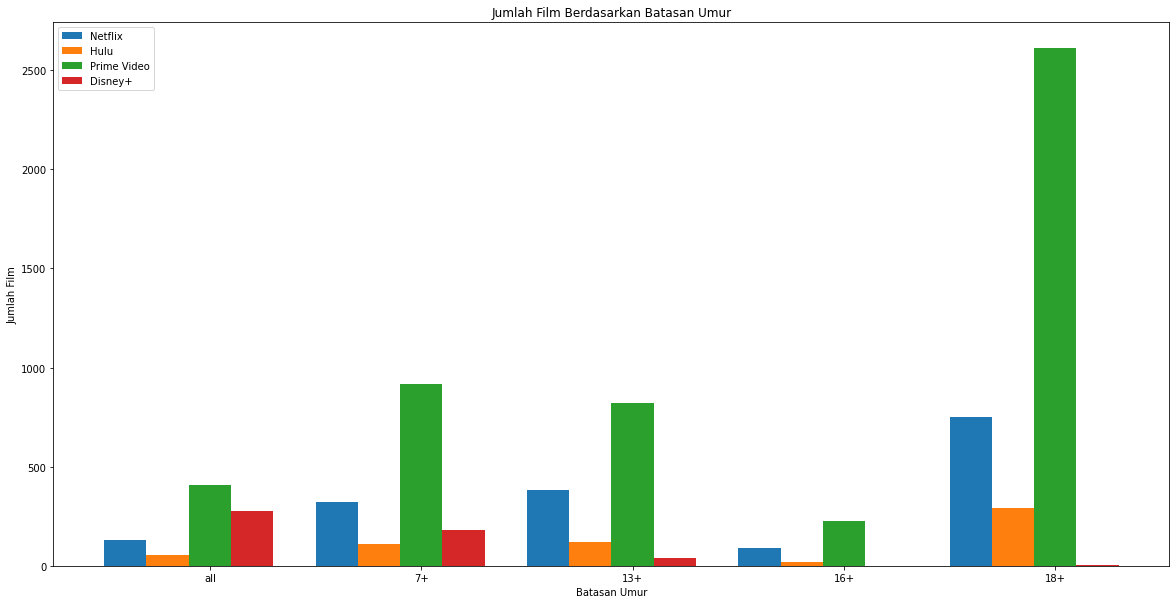

In [ ]:
#Membuat plot
plt.rcParams["figure.figsize"] = (20,10)

X_age =  ['all', '7+', '13+', '16+', '18+']
netflix_umur = age_list[0]
hulu_umur = age_list[1]
prime_umur = age_list[2]
disney_umur = age_list[3]

X_axis_age = np.arange(len(X_age))

plt.bar(X_axis_age - 0.4, netflix_umur, 0.2, label = 'Netflix')
plt.bar(X_axis_age - 0.2, hulu_umur, 0.2, label = 'Hulu')
plt.bar(X_axis_age +0, prime_umur, 0.2, label = 'Prime Video')
plt.bar(X_axis_age +0.2, disney_umur, 0.2, label = 'Disney+')

plt.xticks(X_axis_age, X_age)
plt.xlabel("Batasan Umur")
plt.ylabel("Jumlah Film")
plt.title("Jumlah Film Berdasarkan Batasan Umur")
plt.legend()
plt.show()

###**Rata Rata Rating per Platform**

In [ ]:
df_imdb = movies
for i in range(len(df_imdb['IMDb'])):
  if math.isnan(df_imdb['IMDb'][i]) == True:
    continue
  else:
    df_imdb['IMDb'][i] = math.floor(df_imdb['IMDb'][i])

In [ ]:
#Rata Rata Rating
imdb_netflix = 0
sum_imdb_netflix = 0
imdb_hulu = 0
sum_imdb_hulu = 0
imdb_prime = 0
sum_imdb_prime = 0
imdb_disney = 0
sum_imdb_disney = 0

for i in range(len(movies['ID'])):
  if math.isnan(df_imdb['IMDb'][i]) == False:
    if movies['Netflix'][i] == 1:
      imdb_netflix+=movies['IMDb'][i]
      sum_imdb_netflix+=1
    elif movies['Hulu'][i] == 1:
      imdb_hulu+=movies['IMDb'][i]
      sum_imdb_hulu+=1
    elif movies['Prime Video'][i] == 1:
      imdb_prime+=movies['IMDb'][i]
      sum_imdb_prime+=1
    elif movies['Disney+'][i] == 1:
      imdb_disney+=movies['IMDb'][i]
      sum_imdb_disney+=1

In [ ]:
rata_netflix = round(imdb_netflix/sum_imdb_netflix, 2)
rata_hulu = round(imdb_hulu/sum_imdb_hulu, 2)
rata_prime = round(imdb_prime/sum_imdb_prime, 2)
rata_disney = round(imdb_disney/sum_imdb_disney, 2)

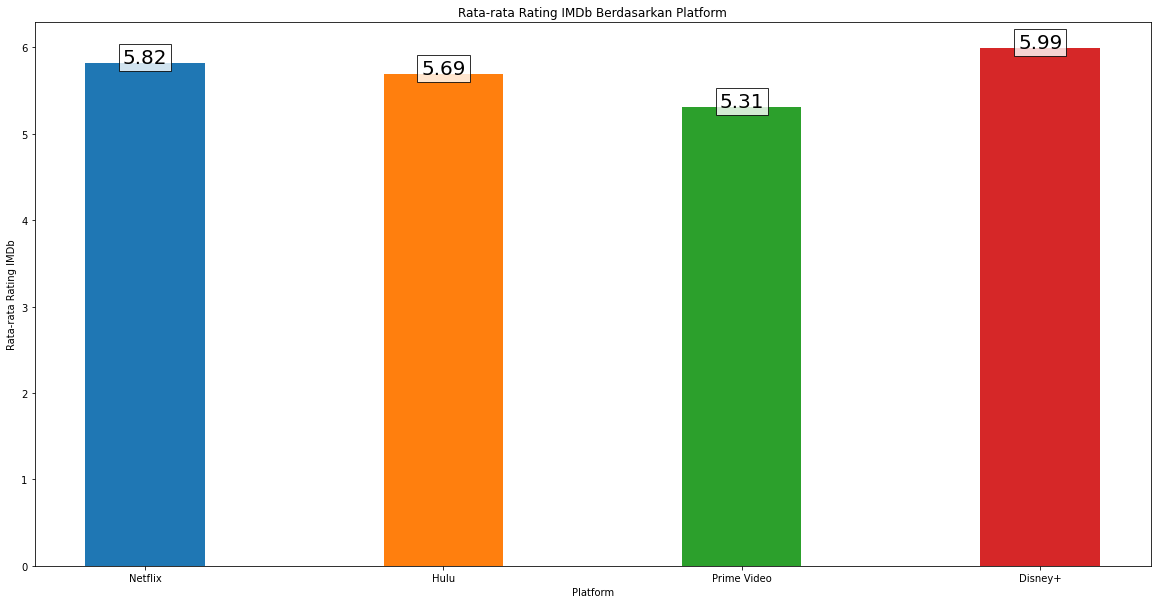

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=20, Bbox = dict(facecolor = 'white', alpha =.8))

data = {'Netflix':rata_netflix, 'Hulu':rata_hulu, 'Prime Video':rata_prime,
        'Disney+':rata_disney}
platform = list(data.keys())
rata = list(data.values())

# creating the bar plot
plt.bar(platform, rata, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width = 0.4)
addlabels(platform, rata)
plt.xlabel("Platform")
plt.ylabel("Rata-rata Rating IMDb")
plt.title("Rata-rata Rating IMDb Berdasarkan Platform")


plt.show()

### **TOP GENRE PER PLATFORM**

Pada dataframe movies terlihat bahwa satu judul film memiliki lebih dari satu genre. Untuk melihat top genre per platform, hal pertama yang harus dilakukan adalah memisahkan genre dalam setiap film tersebut agar mempermudah pengelompokan film berdasarkan genre.


In [ ]:
# membuat dataframe genre
data_genres = movies['Genres'].apply(lambda x: str(x).split(','))
data_genres = pd.get_dummies(data_genres.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
data_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16740,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
16741,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16742,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# melakukan join dataframe movies dengan dataframe genre
movies_genre = movies[['Netflix','Hulu','Prime Video','Disney+']].join(data_genres)

Untuk mengetahui jumlah suatu genre pada salah satu SVOD, maka akan dilakukan groupby.().sum() terhadap SVOD yang akan dilakukan perhitungan jumlah genre.

In [ ]:
# membuat dataframe dari jumlah genre pada SVOD Netflix
top_genre_netflix = movies_genre.drop(['Hulu', 'Prime Video', 'Disney+','nan'],axis=1).groupby(['Netflix']).sum().iloc[1]
top_genre_netflix = pd.DataFrame(top_genre_netflix).sort_values(1,ascending=False)
top_genre_netflix = top_genre_netflix.transpose()

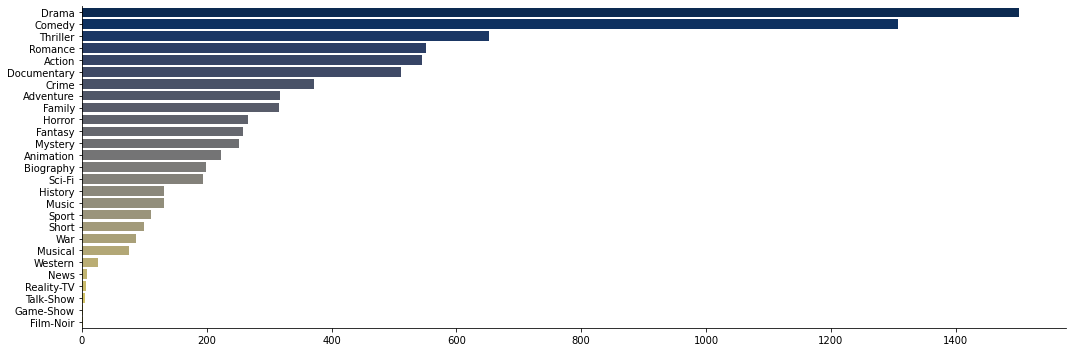

In [ ]:
# membuat plot top genre pada SVOD Netflix
sns.catplot(data=top_genre_netflix,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah genre pada SVOD Hulu
top_genre_hulu = movies_genre.drop(['Netflix', 'Prime Video', 'Disney+','nan'],axis=1).groupby(['Hulu']).sum().iloc[1]
top_genre_hulu = pd.DataFrame(top_genre_hulu).sort_values(1,ascending=False)
top_genre_hulu = top_genre_hulu.transpose()

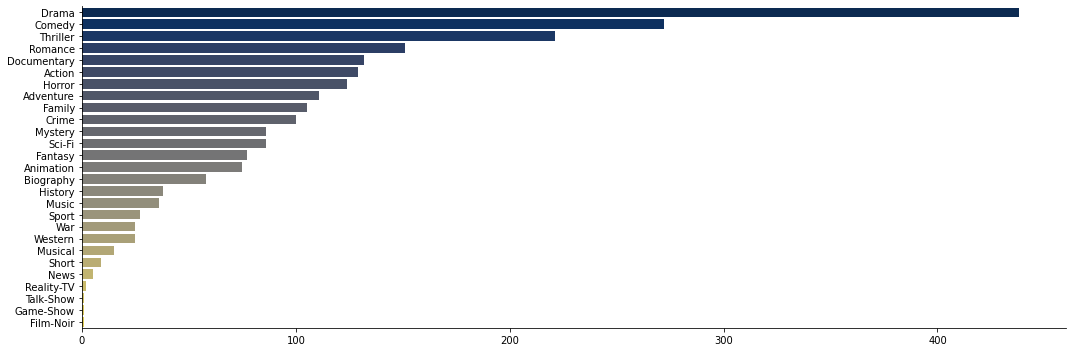

In [ ]:
# membuat plot top genre pada SVOD Hulu
sns.catplot(data=top_genre_hulu,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah genre pada SVOD Prime Video
top_genre_prime = movies_genre.drop(['Netflix', 'Hulu', 'Disney+', 'nan'],axis=1).groupby(['Prime Video']).sum().iloc[1]
top_genre_prime = pd.DataFrame(top_genre_prime).sort_values(1,ascending=False)
top_genre_prime = top_genre_prime.transpose()

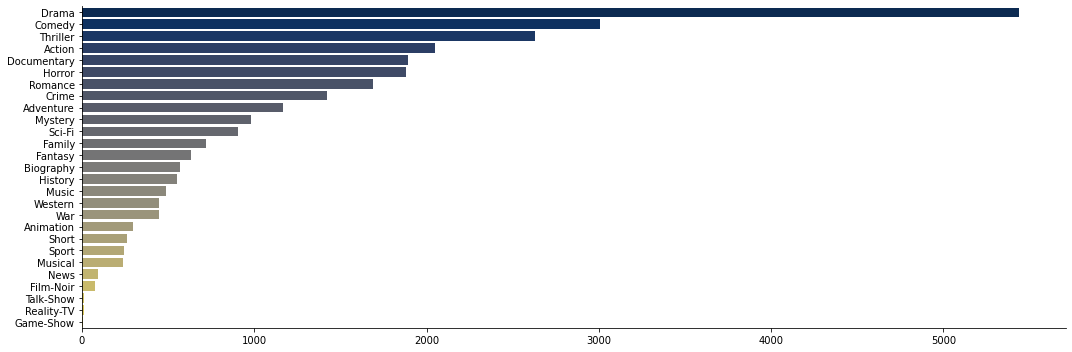

In [ ]:
# membuat plot top genre pada SVOD Prime Video
sns.catplot(data=top_genre_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah genre pada SVOD Disney+
top_genre_disney = movies_genre.drop(['Netflix', 'Hulu', 'Prime Video', 'nan'],axis=1).groupby(['Disney+']).sum().iloc[1]
top_genre_disney = pd.DataFrame(top_genre_disney).sort_values(1,ascending=False)
top_genre_disney = top_genre_disney.transpose()

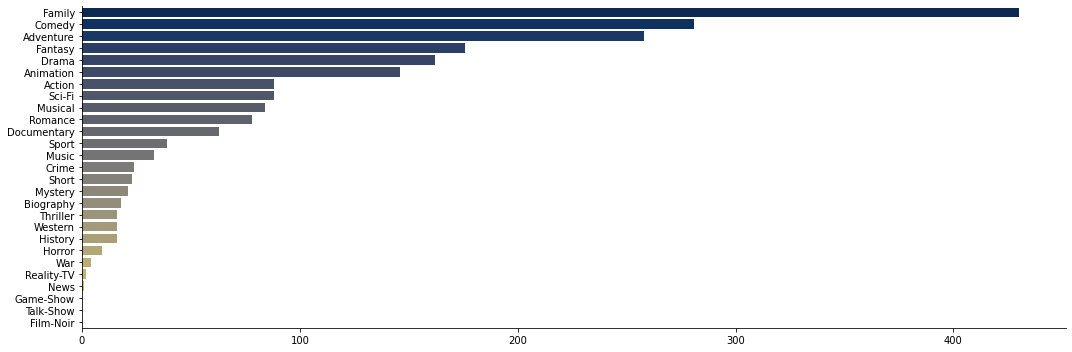

In [ ]:
# membuat plot top genre pada SVOD Disney+
sns.catplot(data=top_genre_disney,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

###**Jumlah Film Berdasarkan Negara**

Pada dataframe movies terlihat bahwa satu judul film bisa memiliki lebih dari satu negara. Untuk melihat top negara per platform, hal pertama yang harus dilakukan adalah memisahkan negara dalam setiap film tersebut agar mempermudah pengelompokan film berdasarkan negara.

In [ ]:
# membuat dataframe negara
data_country = movies['Country'].apply(lambda x: str(x).split(','))
data_country = pd.get_dummies(data_country.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
data_country

,Afghanistan,Albania,Algeria,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Zimbabwe,Costa Rica,El Salvador,Swaziland,Macao,The Democratic Republic Of Congo,Moldova,Oman,Yemen,Laos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# melakukan join dataframe movies dengan dataframe negara
movies_country = movies[['Netflix','Hulu','Prime Video','Disney+']].join(data_country)

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Netflix
top_country_netflix = movies_country.drop(['Hulu', 'Prime Video', 'Disney+'],axis=1).groupby(['Netflix']).sum().iloc[1]
top_country_netflix = pd.DataFrame(top_country_netflix).sort_values(1,ascending=False)
top_country_netflix = top_country_netflix.drop(['nan'])
top_country_netflix = top_country_netflix.head(10)
top_country_netflix = top_country_netflix.transpose()

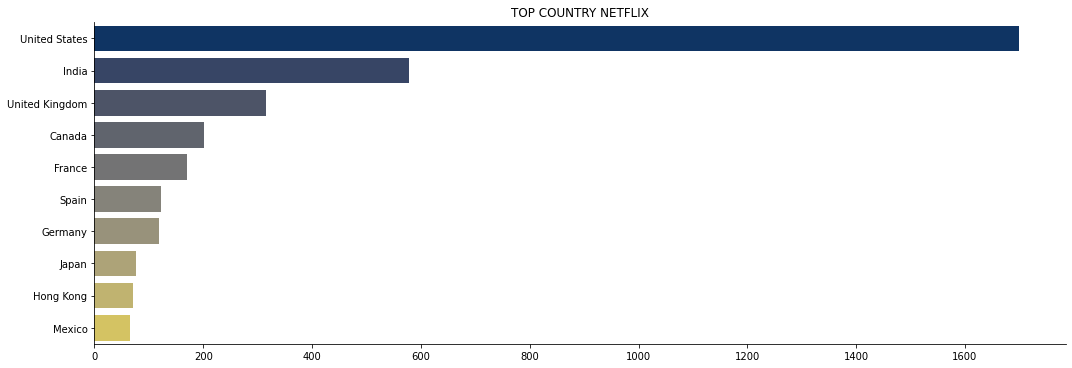

In [ ]:
# membuat plot top negara pada SVOD Netflix
sns.catplot(data=top_country_netflix,kind='bar',palette='cividis',height=5,aspect=3,orient='h').set(title='TOP COUNTRY NETFLIX')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Hulu
top_country_hulu = movies_country.drop(['Netflix', 'Prime Video', 'Disney+'],axis=1).groupby(['Hulu']).sum().iloc[1]
top_country_hulu = pd.DataFrame(top_country_hulu).sort_values(1,ascending=False)
top_country_hulu = top_country_hulu.drop(['nan'])
top_country_hulu = top_country_hulu.head(10)
top_country_hulu = top_country_hulu.transpose()

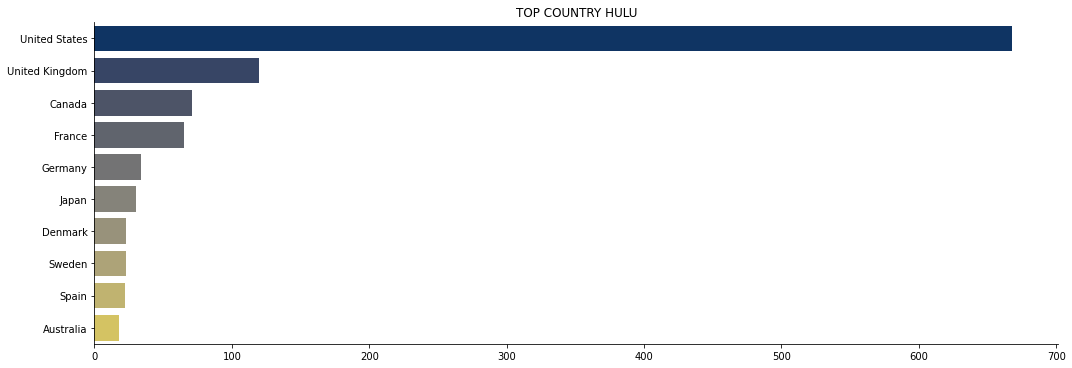

In [ ]:
# membuat plot top negara pada SVOD Hulu
sns.catplot(data=top_country_hulu,kind='bar',palette='cividis',height=5,aspect=3,orient='h').set(title='TOP COUNTRY HULU')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Prime Video
top_country_prime = movies_country.drop(['Netflix', 'Hulu', 'Disney+'],axis=1).groupby(['Prime Video']).sum().iloc[1]
top_country_prime = pd.DataFrame(top_country_prime).sort_values(1,ascending=False)
top_country_prime = top_country_prime.drop(['nan'])
top_country_prime = top_country_prime.head(10)
top_country_prime = top_country_prime.transpose()

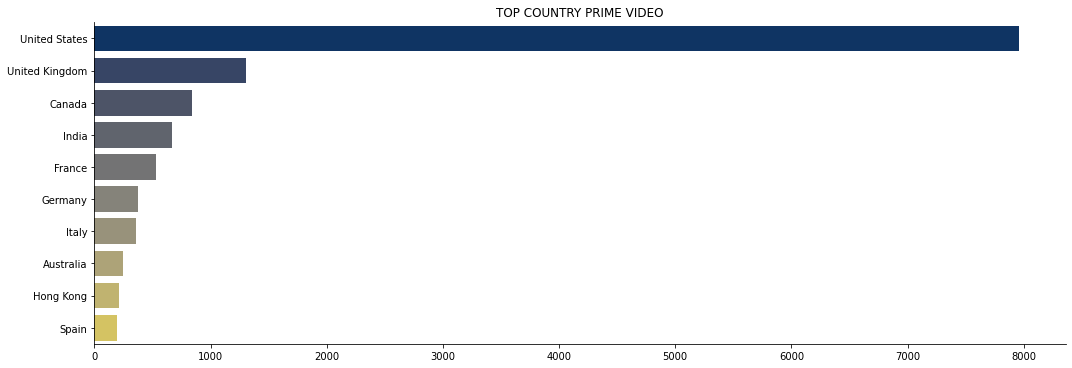

In [ ]:
# membuat plot top negara pada SVOD Prime Video
sns.catplot(data=top_country_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h').set(title='TOP COUNTRY PRIME VIDEO')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Disney+
top_country_disney = movies_country.drop(['Netflix', 'Hulu', 'Prime Video'],axis=1).groupby(['Disney+']).sum().iloc[1]
top_country_disney = pd.DataFrame(top_country_disney).sort_values(1,ascending=False)
top_country_disney = top_country_disney.drop(['nan'])
top_country_disney = top_country_disney.head(10)
top_country_disney = top_country_disney.transpose()

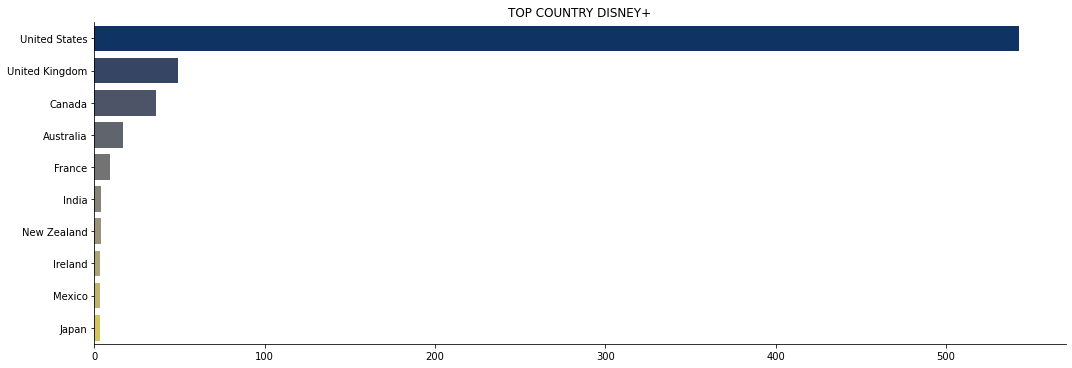

In [ ]:
# membuat plot top negara pada SVOD Disney+
sns.catplot(data=top_country_disney,kind='bar',palette='cividis',height=5,aspect=3,orient='h').set(title='TOP COUNTRY DISNEY+')

### **Top Bahasa per Platform**

In [ ]:
# membuat dataframe bahasa
data_language = movies['Language'].apply(lambda x: str(x).split(','))
data_language =pd.get_dummies(data_language.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [ ]:
# melakukan join dataframe movies dengan dataframe bahasa
movies_language = movies[['Netflix','Hulu','Prime Video','Disney+']].join(data_language)

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Netflix
top_language_netflix = movies_language.drop(['Hulu', 'Prime Video', 'Disney+', 'nan'],axis=1).groupby(['Netflix']).sum().iloc[1]
top_language_netflix = pd.DataFrame(top_language_netflix ).sort_values(1,ascending=False)
top_language_netflix = top_language_netflix.head(10)
top_language_netflix = top_language_netflix.transpose()

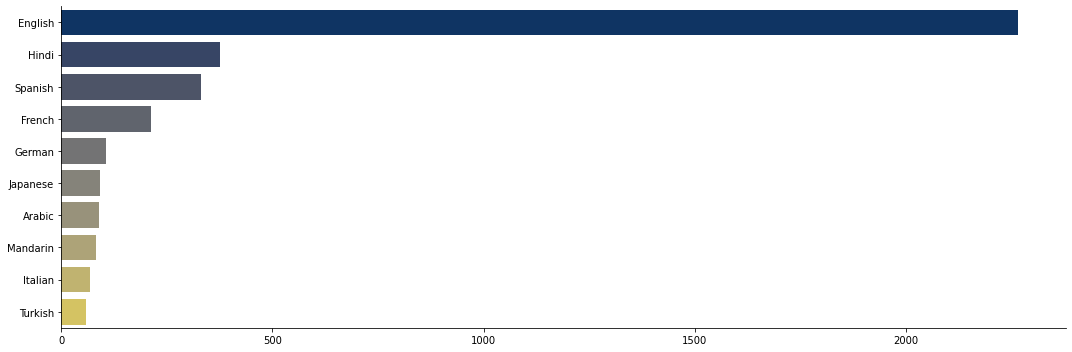

In [ ]:
# membuat plot top negara pada SVOD Netflix
sns.catplot(data=top_language_netflix,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Hulu
top_language_hulu = movies_language.drop(['Netflix', 'Prime Video', 'Disney+', 'nan'],axis=1).groupby(['Hulu']).sum().iloc[1]
top_language_hulu = pd.DataFrame(top_language_hulu ).sort_values(1,ascending=False)
top_language_hulu = top_language_hulu.head(10)
top_language_hulu = top_language_hulu.transpose()

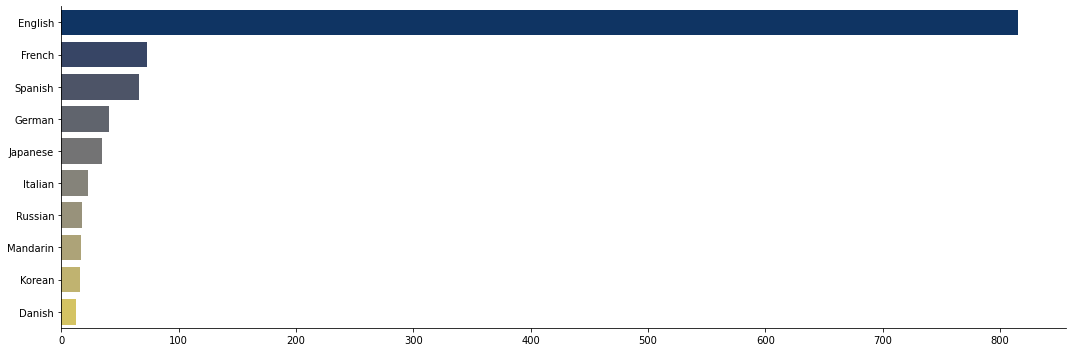

In [ ]:
# membuat plot top negara pada SVOD Hulu
sns.catplot(data=top_language_hulu,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Prime Video
top_language_prime = movies_language.drop(['Netflix', 'Hulu', 'Disney+', 'nan'],axis=1).groupby(['Prime Video']).sum().iloc[1]
top_language_prime = pd.DataFrame(top_language_prime).sort_values(1,ascending=False)
top_language_prime = top_language_prime.head(10)
top_language_prime = top_language_prime.transpose()

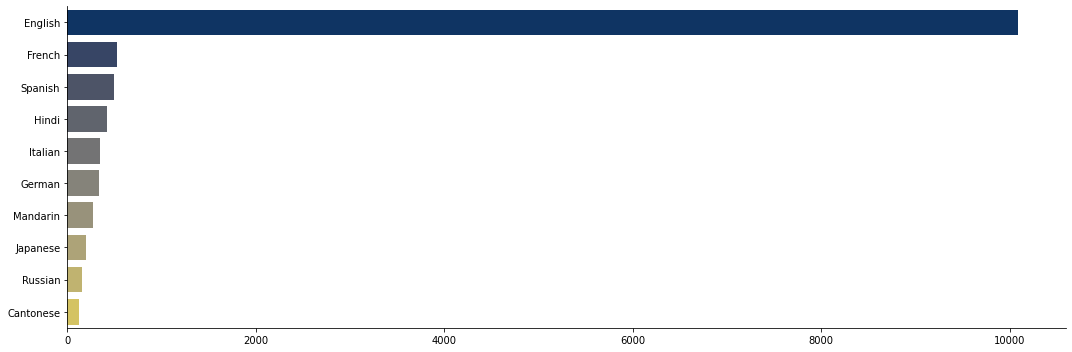

In [ ]:
# membuat plot top negara pada SVOD Prime Video
sns.catplot(data=top_language_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

In [ ]:
# membuat dataframe dari jumlah country pada SVOD Disney+
top_language_disney = movies_language.drop(['Netflix', 'Hulu', 'Prime Video', 'nan'],axis=1).groupby(['Disney+']).sum().iloc[1]
top_language_disney = pd.DataFrame(top_language_disney).sort_values(1,ascending=False)
top_language_disney = top_language_disney.head(10)
top_language_disney = top_language_disney.transpose()

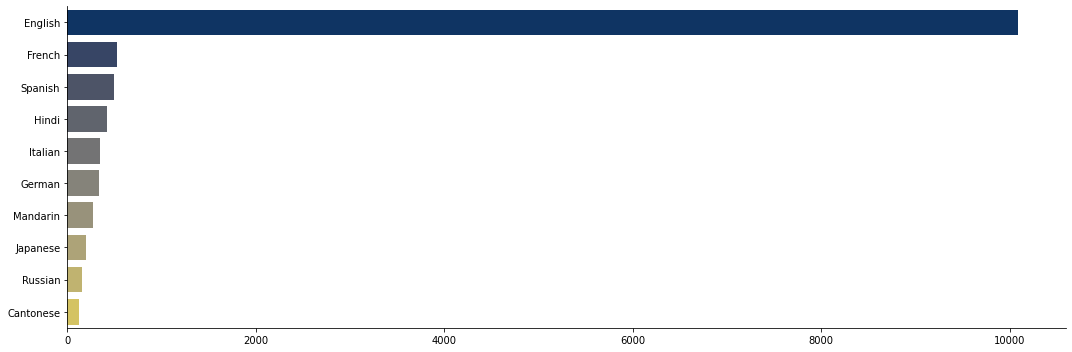

In [ ]:
# membuat plot top negara pada SVOD Disney+
sns.catplot(data=top_language_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

##**Data Saving**

In [ ]:
movies.to_csv('EDA_KELOMPOK4.csv', index=False)

In [ ]:
# menyimpan data dalam bentuk .txt untuk dapat divisualisasikan di voyant tools
filename = tweetFile.replace(".json", ".txt")
tau.saveTweets(cleaned_data, file=filename, type_="plain")

In [ ]:
# menyimpan data tweets yang masih raw secara keseluruhan
from unidecode import unidecode
tweets = [unidecode(t) for t in tweets]
tau.saveTweets(tweets, file=filename.replace(".txt", "_tweets.txt"), type_="plain")

Data yang telah berhasil tersimpan dalam files akan divusalisasikan di voyant tools.